# <font color='red'>Árvore de decisão</font>
- **Uma árvore de decisão** é uma representação de um conjunto de regras criado para tomar qualquer decisão, nesse caso classificar um registro (para problemas de classificação) ou estimar um valor (para problemas de regressão)
- Para cada pergunta da árvore, vamos responder "SIM" ou "NÃO" e essas respostas vão nos guiar até a decisão final. Cada uma dessas perguntas são chamadas de **nós de decisão** (sendo o primeiro nó chamado de **nó raiz*) e a decisão que vamos tomar é chamado de **nó folha**
<br><br>


- A árvore de decisão é uma representação, uma estrutura, e somente a árvore não é Aprendizado de Máquinas. **O que é Machine Learning é a escolha dessas regras para a criação da árvore!**
- Existem **diferentes algoritmos** usados para isso, como o ID3, C4.5, C5.0 e CART.
    - https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
    - O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
        - Em resumo, a seleção dos nós é feita escolhendo qual recurso e limite vai **tornar os próximos passos o mais homogêneo possível**
- Como podemos criar vários nós para a árvore, é um modelo que facilmente pode sofrer overfitting. **Quanto mais nós e folhas**, maior a complexidade da árvore e **menor sua capacidade de generalizar**

- **iris:**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

- Overfitting - > quando a maquina decora as informação 

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [3]:
# Retornando os dados
data = load_iris()

In [4]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data) # data.data -> me da os valores das colunas
iris.columns = data.feature_names # NO meu data set iris eu quero atribuir nomes as colunas
iris['target'] = data.target
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<a id='ajuste_base'></a>
- **Começando apenas com o target 0 e 1 e apenas as colunas de pétala**

In [29]:
# Selecionando apenas as colunas de pétala e esses targets(0,1)
iris1 = iris.loc[iris.target.isin([0,1]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [30]:
# Separando X e y
X = iris1.drop('target', axis=1)
y = iris1.target

- Vamos usar o train_test_split para separar em treino e teste. aqui eu só peguei da documentação mesmo ->
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [31]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Podemos visualizar graficamente os dados de treino dessa base usando o matplotlib. Só pegando da documentação tambem --->**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

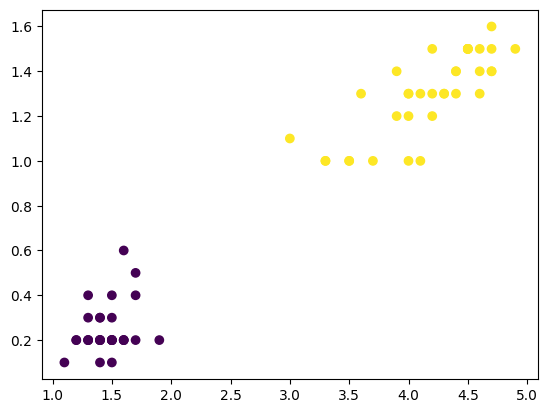

In [35]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)

plt.show()

- **E então usar a árvore de decisão para classificar esses dados**
    - https://scikit-learn.org/stable/modules/tree.html

In [36]:
# Importando a árvore de decisão
from sklearn import tree

In [37]:
# Criando o classificador
clf = tree.DecisionTreeClassifier()

In [39]:
# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [40]:
# Verificando o score
clf.score(X_train, y_train)

1.0

- Podemos exibir essa árvore
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

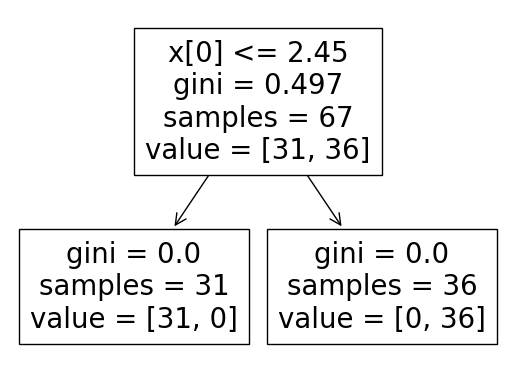

In [42]:
# Visualizando essa árvore
fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

In [43]:
# Relembrando ? quem é meu X_train ?? petalassss
X_train.head(3)

,petal length (cm),petal width (cm)
28,1.4,0.2
93,3.3,1.0
5,1.7,0.4


**Leitura do grafico acima**
- ele vai pegar o petal width 'X[1] <= 0.8' e verificar se é menor ou igual a 8

- x[1] é o valor do meu X no indice 1

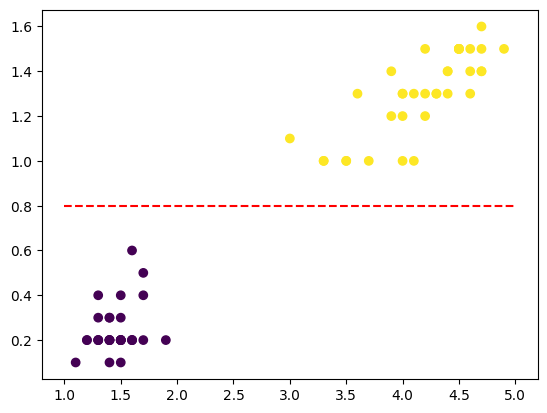

In [44]:
# Podemos adicionar essas regras no nosso gráfico
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)

ax.plot([1,5], [0.8,0.8], '--r')

plt.show()

In [45]:
# Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]], dtype=int64)

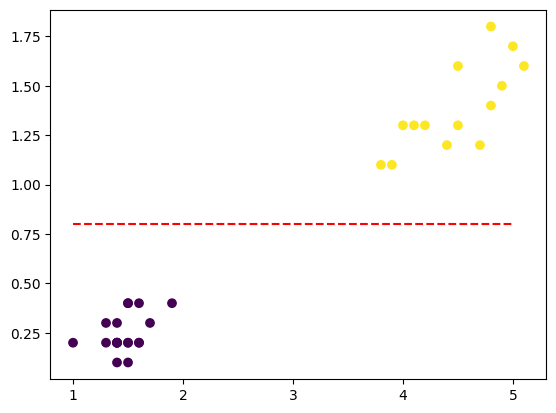

In [46]:
# Visualizando esses dados de teste no gráfico acima
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'],c=y_test)

ax.plot([1,5], [0.8,0.8], '--r')

plt.show()

#### esses dados estavam linearmente separados, vamos aumentarum pouco mais pegando os dados 1,2

- **Podemos [voltar](#ajuste_base) no filtro que fizemos da base e agora considerar a todos os targets mas mantendo somente as 2 colunas de pétala**

In [47]:
# Separando X e y da base completa
iris1 = iris.loc[iris.target.isin([1,2]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [48]:
X = iris1.drop('target', axis=1)
y = iris1.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

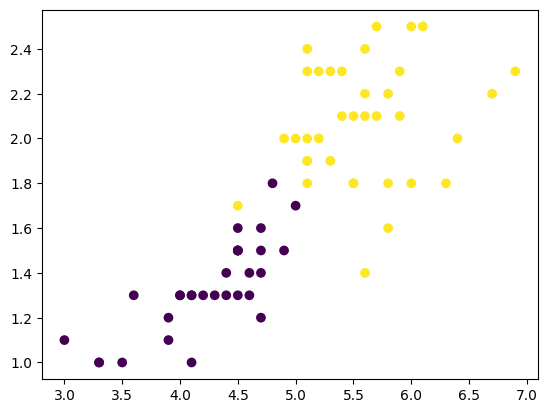

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)

plt.show()

In [52]:
clf = tree.DecisionTreeClassifier(random_state= 42)

In [53]:
clf = clf.fit(X_train, y_train)

In [54]:
clf.score(X_train, y_train)

1.0

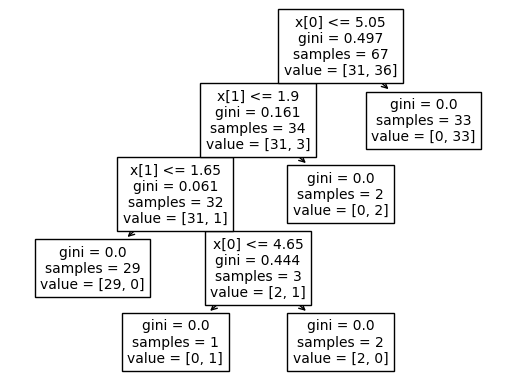

In [55]:

fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

**Agora nossa arvore de decisão ficou um pouco maior, ele pega a primeira coluna e toma a decisão se é maior ou menor que 5.05... depois pega a segunda coluna e ve se é maior ou igual a 1.9 e toma outra decisão... por aí vai**

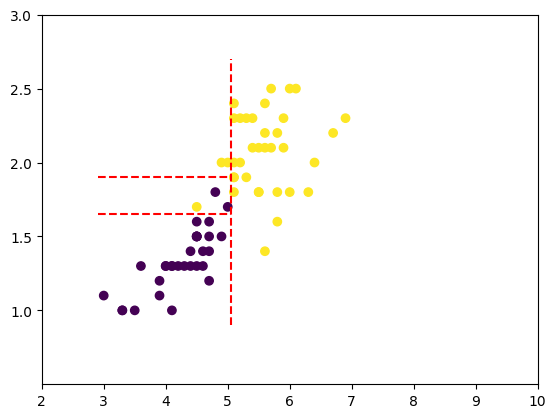

In [60]:
# Fazendo o train_test_split
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'],c=y_train)


# Vizualizando as decisões
ax.plot([5.05, 5.05], [0.9,2.7], '--r')
ax.plot([2.9, 5.05], [1.9,1.9] , '--r')
ax.plot([2.9, 5.05], [1.65,1.65] , '--r')
ax.plot([4.65, 4.65], [1.65,1.9] , '--r')

ax.set(xlim=(2, 8), xticks=(2,3, 4,5, 6,7, 8,9, 10),
       ylim=(0.5, 2.5), yticks=[1,1.5, 2, 2.5, 3])

plt.show()

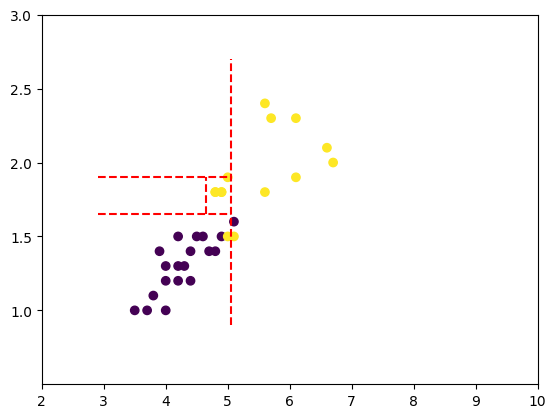

In [61]:
# Vizualizando na base de TESTE
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'],c=y_test)


# Vizualizando as decisões
ax.plot([5.05, 5.05], [0.9,2.7], '--r')
ax.plot([2.9, 5.05], [1.9,1.9] , '--r')
ax.plot([2.9, 5.05], [1.65,1.65] , '--r')
ax.plot([4.65, 4.65], [1.65,1.9] , '--r')

ax.set(xlim=(2, 8), xticks=(2,3, 4,5, 6,7, 8,9, 10),
       ylim=(0.5, 2.5), yticks=[1,1.5, 2, 2.5, 3])

plt.show()

## Separando da base completa

In [62]:
# Separando X e Y da base completa
X = iris.drop('target', axis=1)
y = iris.target

In [63]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
# Criando o classificador
clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train,y_train)


In [65]:
# Verification of score
clf2.score(X_train, y_train)

1.0

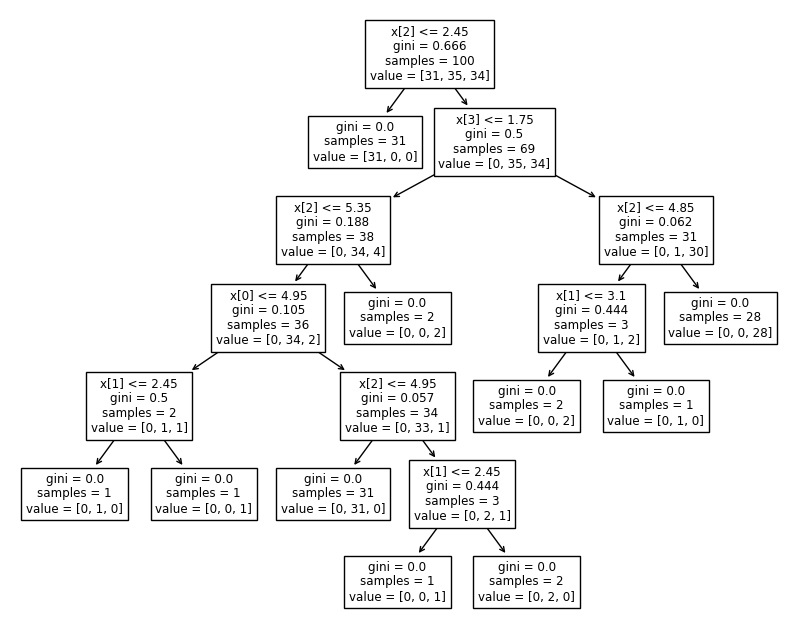

In [67]:
# Vizualizando a arvore
fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [68]:
# Fazendo a previsão 
y_pred2 = clf2.predict(X_test)

In [69]:
# Avaliando o modelo
confusion_matrix(y_test, y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)